# __COMPUTATION II: ALGORITHMS & DATA STRUCTURES__

# PROJECT

Group Name:Group 21

Group Members: Gonçalo Faustino, Miguel Pires, Bernardo Coelho

Student Numbers: 20231721,20231736,20231718

--------------------------
**Don't change or modify the order and titles of this notebook.** However, feel free to add as many cells as you want between sections. 

Good luck!

# Section 1: Dataset

Read and store the dataset file provided to you (`sales_dataset_group_<X>.pkl`).

Store the dataset under the variable name `dataset`.

In [1]:
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

with open("sales_dataset_group_21.pkl", "rb") as data:
    dataset = pickle.load(data)


# Section 2: Fixing problems in the dataset

Fix here any problems you may find in the dataset while you're developing the project. 

**Do not modify the dataset anywhere else except in this section!**

In [3]:
# creating a name list for the purpose of seeing errors in name spelling and sorted in alphabetical order
def get_names(data_list):
    unique_names = []
    for data in data_list:
        name = data["Name"]
        if name not in unique_names:
            unique_names.append(name)
    return sorted(unique_names)
# nomes mal escrito é erro?

# creating a price list for purposes of fixing errors in price setting
def price_list(dataset):
    price_list = {}
    for data in dataset:
        item = data["Item"]
        unit_price = data["Unit Price"]
        if isinstance(unit_price, (int, float)):
            if not isinstance(item, (int, float)):
                if item not in price_list:
                    price_list[item] = unit_price
    return price_list

# Section 3: Extraction of Information

### Extraction of recency, frequency and monetary values

In [39]:
#function that retrieves a list of the data for each costumer, input the name as a string
def costumer_data_function(name):
    costumer_data = []
    for i in dataset:
        if i["Name"].lower() == name.lower():
            costumer_data.append(i)
    return costumer_data

#function that retrieves the last purchase date and the number of days since the last purchase, input the name as a string
def lastpurchasedate(name):
    costumer_data = costumer_data_function(name)
    last_purchase_date = costumer_data[0]["Date"]
    for data in costumer_data:
        if data["Date"] > last_purchase_date:
            last_purchase_date = data["Date"]
    
    last_purchase_datetime = datetime.strptime(last_purchase_date, '%Y-%m-%d')
    reference_datetime = datetime.strptime('2024-03-01', '%Y-%m-%d')
    days_passed = (reference_datetime - last_purchase_datetime).days
    
    return last_purchase_date, days_passed

# dictionary with costumer name as key and days since last purchase as value
recency = {}
for data in dataset:
    name = data["Name"]
    last_purchase_date, days_passed = lastpurchasedate(name)
    recency[name] = days_passed

#function that retrieves the number of purchases for each student, input the name as a string
def numberofpurchases(name):
    costumer_data = costumer_data_function(name)
    return len(costumer_data)

#dictionary to store the number of purchases for each student
frequency = {}
for data in dataset:
    name = data["Name"]
    if name in frequency:
        frequency[name] += 1
    else:
        frequency[name] = 1
        
#function that retrieves the total amount spent by each student, input the name as a string
def totalamountspent(name):
    costumer_data = costumer_data_function(name)
    total = 0
    error = 0
    for i in costumer_data:
        unit_price = i["Unit Price"]
        item = i["Item"]
        if isinstance(unit_price, (int, float)):
            total += unit_price * i["Quantity"]
        elif isinstance(unit_price, str) and unit_price in price_list(dataset):
            total += price_list(dataset)[unit_price] * i["Quantity"]
        else:
            error += 1
            print(f"Error: Invalid unit price '{unit_price}' for item '{i['Item']}'")

    print(f"There were {error} errors found in the data.")
    return total

#dictionary to store the total amount spent by each student
monetary_value = {}

for data in dataset:
    name = data["Name"]
    unit_price = data["Unit Price"]
    quantity = data["Quantity"]
    
    if isinstance(unit_price, (int, float)):
        value = unit_price * quantity
    elif isinstance(unit_price, str) and unit_price in price_list(dataset):
        value = price_list(dataset)[unit_price] * quantity
    else:
        value = 0
    if name in monetary_value:
        monetary_value[name] += value
    else:
        monetary_value[name] = value




In [40]:
#Test Cell


### Histograms

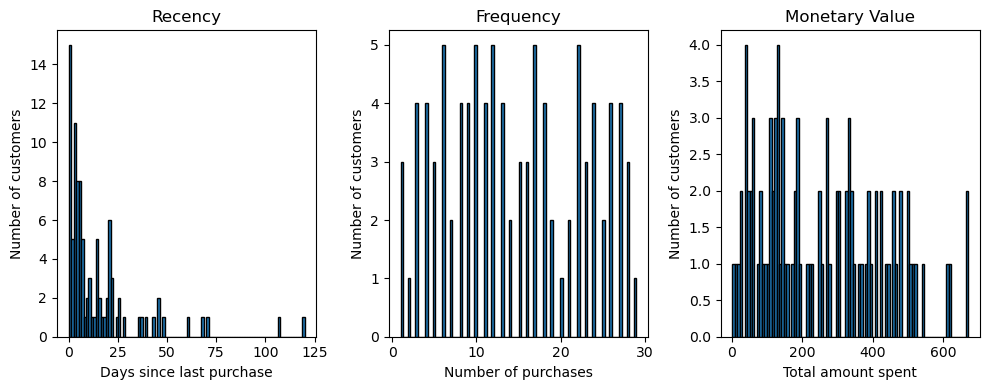

In [99]:

# Plot recency
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.hist(list(recency.values()), bins=len(recency.values()), edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Days since last purchase')
plt.ylabel('Number of customers')
plt.title('Recency')

# Plot frequency
plt.subplot(1, 3, 2)
plt.hist(list(frequency.values()), bins=len(recency.values()), edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Number of purchases')
plt.ylabel('Number of customers')
plt.title('Frequency')

# Plot monetary value
plt.subplot(1, 3, 3)
plt.hist(list(monetary_value.values()), bins=len(recency.values()), edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Total amount spent')
plt.ylabel('Number of customers')
plt.title('Monetary Value')

plt.tight_layout()
plt.show()


# Section 4: Sorting

### First RFM scores (RFM)

In [94]:
# Sorting the recency
sorted_recency = sorted(recency.items(), key=lambda x: x[1], reverse=False)
length = len(sorted_recency)
third_size = length // 3
#atributing scores
recency_scores = {}
for i, (student, _) in enumerate(sorted_recency):
    if i < third_size:
        recency_scores[student] = 3
    elif i < 2 * third_size:
        recency_scores[student] = 2
    else:
        recency_scores[student] = 1

# Sorting the frequency
sorted_frequency = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
#atributing scores
frequency_scores = {}
for i, (student, _) in enumerate(sorted_frequency):
    if i < third_size:
        frequency_scores[student] = 3
    elif i < 2 * third_size:
        frequency_scores[student] = 2
    else:
        frequency_scores[student] = 1

# Sorting the monetary value
sorted_monetary_value = sorted(monetary_value.items(), key=lambda x: x[1], reverse=True)
#atributing scores
monetary_value_scores = {}
for i, (student, _) in enumerate(sorted_monetary_value):
    if i < third_size:
        monetary_value_scores[student] = 3
    elif i < 2 * third_size:
        monetary_value_scores[student] = 2
    else:
        monetary_value_scores[student] = 1



- Can you determine which students are most valuable to our SU, considering that our
organization is evil and values students solely based on their purchase history?

Answer: 

### Second RFM Scores (RFM')

In [87]:

# function that takes as input the desired score and retrives a dictionary with the people with that score
def recency_scores_func(num):
    recency_scores_var = {}
    if num == 1:
        for key, value in recency_scores.items():
            if value == 1:
                recency_scores_var[key] = value
    if num == 2:
        for key, value in recency_scores.items():
            if value == 2:
                recency_scores_var[key] = value
    if num == 3:
        for key, value in recency_scores.items():
            if value == 3:
                recency_scores_var[key] = value
    return recency_scores_var

# function that takes as input num1 the desired recency_scores_func() dictionary and as num2 the desired frequency dictionary inside that dictionary
def recency_frequency_func(num1,num2):
    recency_scores_var = recency_scores_func(num1)
    
        

### Correlation

# Section 5: Searching

### Linear Search

- Who do you think is the best student/customer among your group?

Answer:

### Alphabetical Sorting

### Binary Search

- How much time, in terms of seconds, did it take to find a name using linear search and
binary search? Compare the results. (You can use the timeit module.)

Answer:

---------------------

Great job, congrats!